<a href="https://www.kaggle.com/code/nihirshah/your-dad-joked-once?scriptVersionId=125225170" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dad-a-base-of-jokes/dad-a-base.csv


In [2]:
# Data Structures
import numpy  as np
import pandas as pd
import geopandas as gpd
import json

# Corpus Processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
df= pd.read_csv('/kaggle/input/dad-a-base-of-jokes/dad-a-base.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Joke    743 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


In [5]:
df.head(10)

,Joke
0,I'm tired of following my dreams. I'm just goi...
1,Did you hear about the guy whose whole left si...
2,Why didn’t the skeleton cross the road? Becaus...
3,What did one nut say as he chased another nut?...
4,Where do fish keep their money? In the riverba...
5,I accidentally took my cats meds last night. D...
6,Chances are if you' ve seen one shopping cente...
7,Dermatologists are always in a hurry. They spe...
8,"I knew I shouldn't steal a mixer from work, bu..."
9,I won an argument with a weather forecaster on...


# Data preprocessing

## 1) lowercasing

In [6]:
df['Joke']=df['Joke'].str.lower()
df.head(10)

,Joke
0,i'm tired of following my dreams. i'm just goi...
1,did you hear about the guy whose whole left si...
2,why didn’t the skeleton cross the road? becaus...
3,what did one nut say as he chased another nut?...
4,where do fish keep their money? in the riverba...
5,i accidentally took my cats meds last night. d...
6,chances are if you' ve seen one shopping cente...
7,dermatologists are always in a hurry. they spe...
8,"i knew i shouldn't steal a mixer from work, bu..."
9,i won an argument with a weather forecaster on...


## 2)  removing punctuations

In [7]:
df['Joke'][2]

'why didn’t the skeleton cross the road? because he had no guts. \t'

In [8]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:


# Define a function to remove punctuation from a string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the remove_punctuation function to the 'joke' column in the DataFrame
df['Joke'] = df['Joke'].apply(remove_punctuation)

In [10]:
df['Joke'][2]

'why didn’t the skeleton cross the road because he had no guts \t'

## 3) tokenization, removing stop words and stemming

In [11]:
from nltk.tokenize import word_tokenize
def tokenizer_1(Text):
    token = word_tokenize(Text)
    return(token)
df['Joke'] = df['Joke'].apply(tokenizer_1)

In [12]:
from nltk.corpus import stopwords
def threeLetters(listOfTokens):
    threeLetterWord = []
    for token in listOfTokens:
        if len(token) <= 3 or len(token) >= 21:
            threeLetterWord.append(token)
    return threeLetterWord
def removeWords(listOfTokens):
    return [token for token in listOfTokens if token not in stopwords.words('english')]
df['Joke']=df['Joke'].apply(removeWords)

In [13]:
df['Joke']

0      [im, tired, following, dreams, im, going, ask,...
1      [hear, guy, whose, whole, left, side, cut, hes...
2                       [’, skeleton, cross, road, guts]
3      [one, nut, say, chased, another, nut, im, cashew]
4                         [fish, keep, money, riverbank]
                             ...                        
738                   [call, guy, lying, doorstep, matt]
739       [met, girl, dating, site, dont, know, clicked]
740                    [calculator, say, student, count]
741    [call, gorilla, wearing, headphones, anything,...
742    [heard, corduroy, pillows, theyre, making, hea...
Name: Joke, Length: 743, dtype: object

* we can perform parts of speech tagging here to remove nouns, since they don't contribute much to jokes but to start of we'll let them be.

In [14]:

#nltk.download('wordnet')



#lemmatizer = nltk.stem.WordNetLemmatizer()

#def lemmatize_text(text):
#    return [lemmatizer.lemmatize(w) for w in text]

#df['Joke'] = df['Joke'].apply(lemmatize_text)

In [15]:
stemmer = SnowballStemmer('english')

def applyStemming(listOfTokens):
    return [stemmer.stem(token) for token in listOfTokens]

df['Joke'] = df['Joke'].apply(applyStemming)

finally, after an hour of brainfuck

In [16]:
df.head()

,Joke
0,"[im, tire, follow, dream, im, go, ask, go, mee..."
1,"[hear, guy, whose, whole, left, side, cut, hes..."
2,"[’, skeleton, cross, road, gut]"
3,"[one, nut, say, chase, anoth, nut, im, cashew]"
4,"[fish, keep, money, riverbank]"


# Feature engineering

In [17]:
vectorizer = TfidfVectorizer()

# Convert list of tokens to string
df['Joke'] = df['Joke'].apply(lambda x: ' '.join(x))


X = vectorizer.fit_transform(df['Joke'])
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

743 rows


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,733,734,735,736,737,738,739,740,741,742
im,0.495921,0.0,0.0,0.253467,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.488782,0.269025,0.0,0.0,0.0,0.0,0.0,0.0
go,0.391014,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
tire,0.346018,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
dream,0.330735,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
follow,0.330735,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


this shows how important it is to remove stopwords

In [18]:
df.head

<bound method NDFrame.head of                                                   Joke
0         im tire follow dream im go ask go meet later
1         hear guy whose whole left side cut hes right
2                            ’ skeleton cross road gut
3                one nut say chase anoth nut im cashew
4                            fish keep money riverbank
..                                                 ...
738                         call guy lie doorstep matt
739                 met girl date site dont know click
740                           calcul say student count
741  call gorilla wear headphon anyth youd like can...
742           heard corduroy pillow theyr make headlin

[743 rows x 1 columns]>

# Modelling

In [19]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [20]:
k = 8
kmeans_results = run_KMeans(k, final_df)

## Cluster Analysis
Now we can choose the best number of K and take a deeper look at each cluster. Looking at the plots above, we have some clues that when K = 5 is when the clusters are best defined. So first we will use a simple histogram to look at the most dominant words in each cluster:

In [21]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


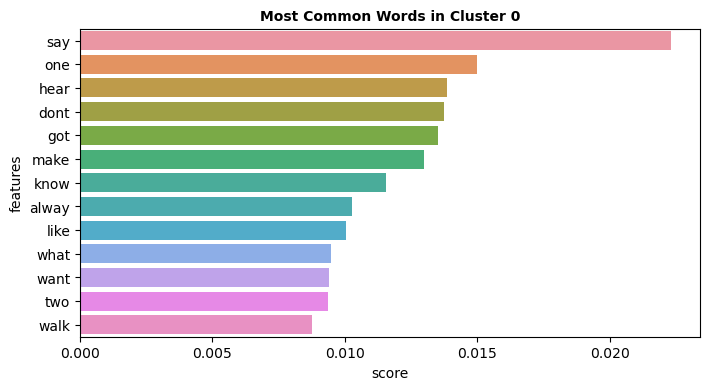

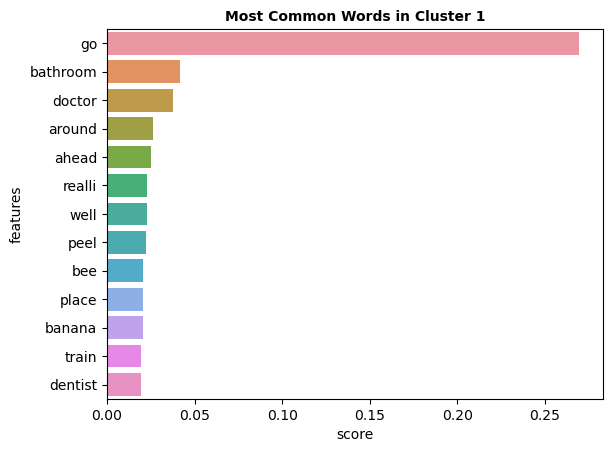

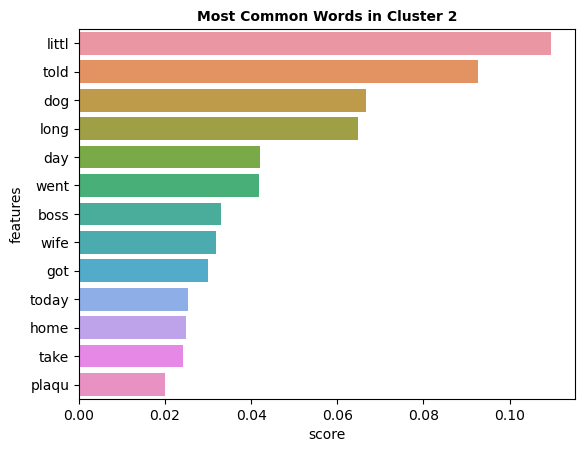

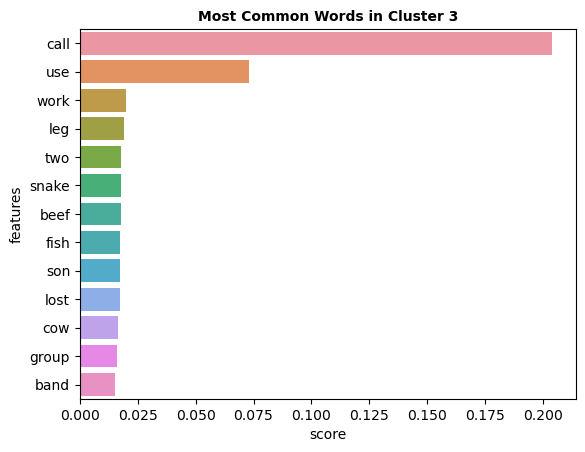

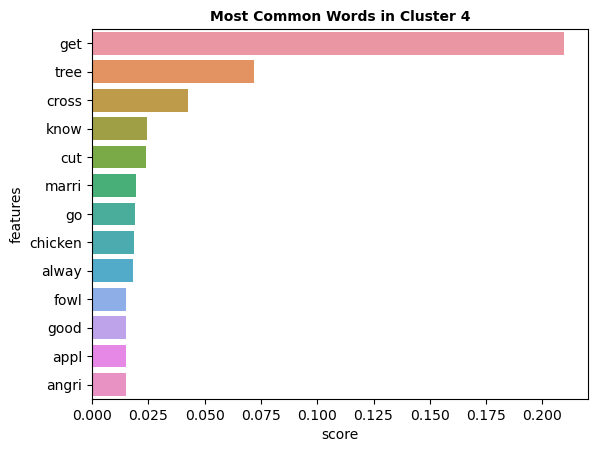

In [22]:
best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

## Map of Words
Now that we can look at the graphs above and see the best scored words in each cluster, it's also interesting to make it prettier by making a map of words of each cluster!

In [23]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

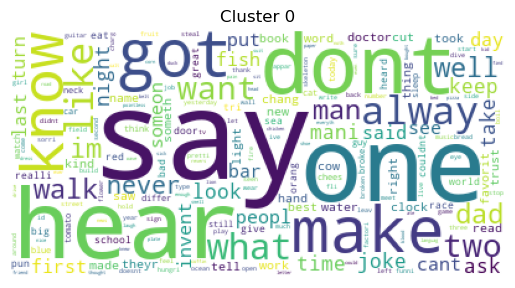

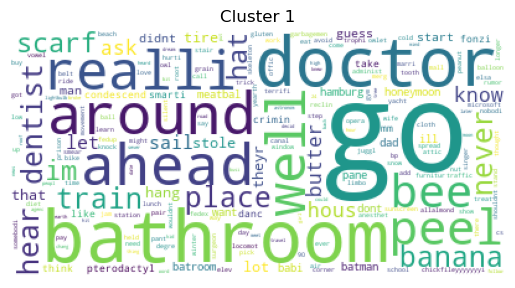

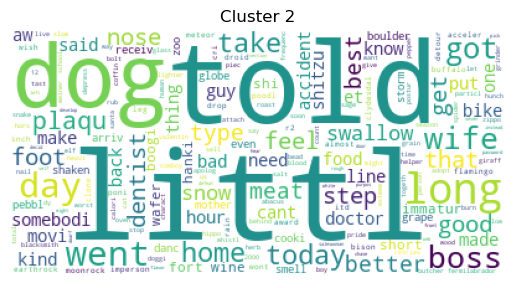

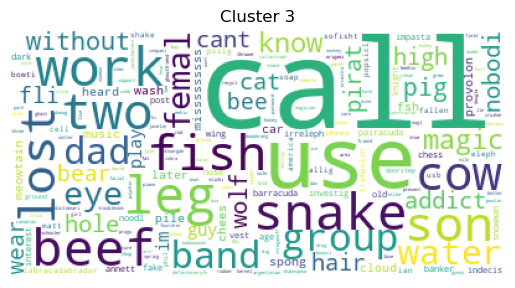

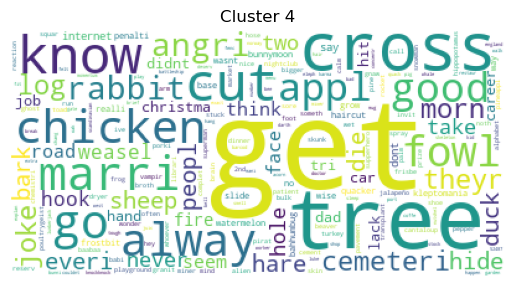

In [24]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [25]:
cluster_labels = kmeans.fit_predict(final_df)

# Add a new column to the dataframe containing the cluster labels
df['Cluster'] = cluster_labels

# Print the cluster assignments for each joke
for cluster_id in range(5):
    print(f"Cluster {cluster_id}:")
    cluster_jokes = df[df['Cluster'] == cluster_id]['Joke']
    print(cluster_jokes)

Cluster 0:
1           hear guy whose whole left side cut hes right
2                              ’ skeleton cross road gut
3                  one nut say chase anoth nut im cashew
4                              fish keep money riverbank
5            accident took cat med last night ’ ask meow
                             ...                        
736    im practic bugeat contest ive got butterfli st...
737                 heart lion lifetim ban san diego zoo
739                   met girl date site dont know click
740                             calcul say student count
742             heard corduroy pillow theyr make headlin
Name: Joke, Length: 513, dtype: object
Cluster 1:
0           im tire follow dream im go ask go meet later
36     wife honey ’ pregnant well… wife well guess go...
45           man realli love furnitur reclin go way back
73                            banana go doctor peel well
149               dad think go snow winter dont know air
155                        

In [26]:
df.head

<bound method NDFrame.head of                                                   Joke  Cluster
0         im tire follow dream im go ask go meet later        1
1         hear guy whose whole left side cut hes right        0
2                            ’ skeleton cross road gut        0
3                one nut say chase anoth nut im cashew        0
4                            fish keep money riverbank        0
..                                                 ...      ...
738                         call guy lie doorstep matt        3
739                 met girl date site dont know click        0
740                           calcul say student count        0
741  call gorilla wear headphon anyth youd like can...        3
742           heard corduroy pillow theyr make headlin        0

[743 rows x 2 columns]>

In [27]:
df['Cluster'].value_counts()

0    513
3     74
4     64
2     48
1     44
Name: Cluster, dtype: int64

It seems that the zeroth cluster holds all the bias
There can be several reasons why one of the clusters in our k-means model may be holding 50% of the total data. Some possible reasons are:

Imbalanced Data: If our dataset is imbalanced, that is, one or more classes are overrepresented in the data, then it's possible that the k-means algorithm is clustering most of the data into the overrepresented class.

Poor Initialization: The k-means algorithm is sensitive to the initialization of the cluster centroids. If the initial positions of the centroids are not well distributed or randomly selected, the algorithm may converge to a local minimum rather than the global minimum, which could result in biased clusters.

Inappropriate k-value: If the value of k is too large or too small, the clustering results may not be meaningful. A large value of k could result in overfitting, while a small value of k could result in underfitting. Therefore, it's important to choose an appropriate value of k based on your data and the problem at hand.

## Network

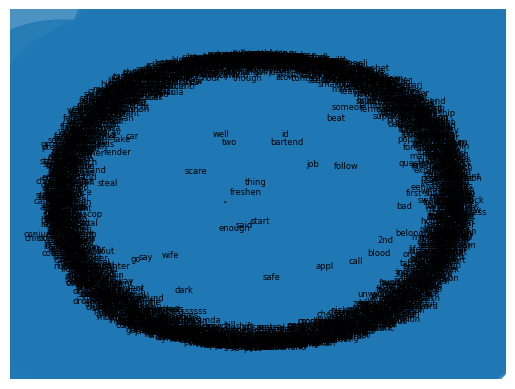

In [28]:
import networkx as nx
from collections import Counter

# Create a graph object
G = nx.Graph()

# Iterate through each cluster
for cluster in df['Cluster'].unique():
    
    # Get all jokes in the current cluster
    jokes = df[df['Cluster']==cluster]['Joke']
    
    # Iterate through each joke and get all pairs of adjacent words
    word_pairs = []
    for joke in jokes:
        words = joke.split()
        for i in range(len(words)-1):
            word_pairs.append((words[i], words[i+1]))
    
    # Count the frequency of each word pair
    word_pairs_count = Counter(word_pairs)
    
    # Add edges between words with non-zero frequency
    for (w1, w2), freq in word_pairs_count.items():
        if freq > 0:
            G.add_edge(w1, w2, weight=freq)

# Set node and edge sizes based on frequency
node_size = [1000 * G.degree(node) for node in G.nodes()]
edge_size = [0.5 * G[u][v]['weight'] for u,v in G.edges()]

# Draw the graph
pos = nx.spring_layout(G, k=1.5)
nx.draw_networkx_nodes(G, pos, node_size=node_size, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='grey', width=edge_size, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=6, font_family='Arial', font_color='black')
plt.axis('off')
plt.show()


looks kinda messy, let's  make a single plot for each cluster

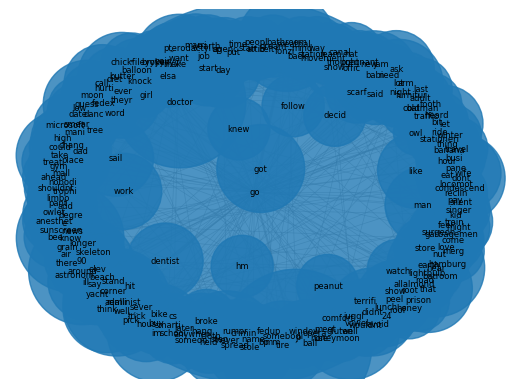

In [29]:
G = nx.Graph()
 
jokes = df[df['Cluster']==1]['Joke']
    
    # Iterate through each joke and get all pairs of adjacent words
word_pairs = []
for joke in jokes:
    words = joke.split()
    for i in range(len(words)-1):
        word_pairs.append((words[i], words[i+1]))
    
    # Count the frequency of each word pair
word_pairs_count = Counter(word_pairs)
    
    # Add edges between words with non-zero frequency
for (w1, w2), freq in word_pairs_count.items():
    if freq > 0:
        G.add_edge(w1, w2, weight=freq)
# Set node and edge sizes based on frequency
node_size = [1000 * G.degree(node) for node in G.nodes()]
edge_size = [0.5 * G[u][v]['weight'] for u,v in G.edges()]

# Draw the graph
pos = nx.spring_layout(G, k=1.5)
nx.draw_networkx_nodes(G, pos, node_size=node_size, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='grey', width=edge_size, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=6, font_family='Arial', font_color='black')
plt.axis('off')
plt.show()

Still messy, yet some information can still be extracted:
* the most common words tend to come in the center since they posses the most no. of connections with other words.
* the above statement is true but not generalised since the words like doctr and bathroom are most frequently used but do not appear in the center because it seems that they might be appearing with a single word rather than with different words